In [ ]:
### Pre-trained Models - II

**Roberto dos Reis**<br>
Northwestern University

July/2020

In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

In [2]:
# Load the Xception model
# https://keras.io/applications/#xception
model = Xception(
    include_top=True,
    weights='imagenet')

In [3]:
# Default Image Size for Xception
image_size = (299, 299)

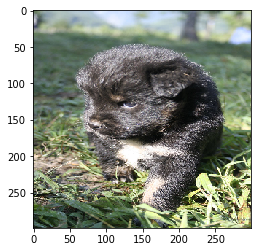

In [4]:
# Load the image and resize to the input dimensions that Xception
# was trained with
image_path = os.path.join('Images", "pup.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [5]:
# Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [('n02111277', 'Newfoundland', 0.25438276), ('n02104365', 'schipperke', 0.09033302), ('n02108551', 'Tibetan_mastiff', 0.08263823)]


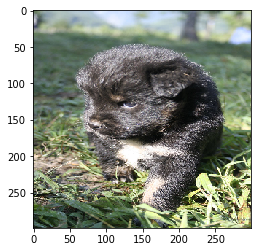

In [6]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [7]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use Xception to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n02123394', 'Persian_cat', 0.18115059), ('n02123045', 'tabby', 0.1335955), ('n02123159', 'tiger_cat', 0.0803211)]


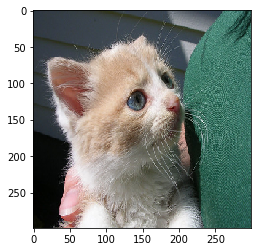

In [8]:
image_path = os.path.join("Images", "kitten.jpg")
predict(image_path)